# **Customer Segmentation**

**Dataset: [Online Retail Dataset Link](https://drive.google.com/file/d/16yBunB9iulFnLAjSxQeZR2zeQm71U9bo/view?usp=sharing). Taken from [UCI Machine Learning Repository Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail)**

*Dataset used in these Research Papers,*

**1. The evolution of direct, data and digital marketing, Richard Webber, Journal of Direct, Data and Digital Marketing Practice(2013)**

**2. Clustering Experiments on Big Transaction Data for Market Segmentation,
Ashishkumar Singh, Grace Rumantir, Annie South, Blair Bethwaite, Proceedings of the 2014 International Conference on Big Data Science and Computing.**

**3. A decision-making framework for precision marketing, Zhen You, Yain-Whar Si, Defu Zhang, XiangXiang Zeng, Stephen C.H. Leung c, Tao Li, Expert Systems with Applications(2015).**

## **1.) Importing the Required Libraries**

In [ ]:
from numpy import unique
from numpy import where
import numpy as np

import seaborn as sns
import pandas as pd

from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

import datetime as dt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, OPTICS
from sklearn.cluster import AffinityPropagation, SpectralClustering, MeanShift, MiniBatchKMeans

from sklearn.mixture import GaussianMixture

from sklearn.metrics import davies_bouldin_score

from yellowbrick.cluster import KElbowVisualizer

from itertools import combinations

pd.options.mode.chained_assignment = None

plt.rcParams["axes.facecolor"] = "#A2A2A2"
plt.rcParams["axes.grid"] = 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **2.) General Informations and Cleaning the Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Online Retail.csv",encoding= 'unicode_escape')
print("First Five Values of the Dataset.")
display(df.head())
print("***********************************")
print("Shape of the Dataset is",df.shape)
print("***********************************")
print("Last Five Values of the Dataset.")
display(df.tail())

First Five Values of the Dataset.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


***********************************
Shape of the Dataset is (541909, 8)
***********************************
Last Five Values of the Dataset.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


*In this Dataset we are having 5,41,910 Rows and 8 Columns. It is a Huge Data*

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Notice:** *In Description and Customer ID, we are having Missing Values.*

In [ ]:
display(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

*We have 1,454 Null Values in Description and 1,35,080 Null values in CustomerID*

In [ ]:
df[df.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [ ]:
df[df.Description.isnull()].CustomerID.nunique()

0

In [ ]:
df[df.Description.isnull()].UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

*Let's Drop NaN Values*

In [ ]:
df=df[df.Description.notnull()]

In [ ]:
df[df.CustomerID.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
print("We had {} Observations Previously.".format(df.shape[0]))
df=df[df.CustomerID.notnull()]
print("Currently, We are having {} Observations after Removing Unknown Customers.".format(df.shape[0]))

We had 540455 Observations Previously.
Currently, We are having 406829 Observations after Removing Unknown Customers.


*We have removed nearly 1,33,626 Records*

Now we will check for Null Values

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

*Finally We have Successfully Removed the Null Values in the Dataset*

In [ ]:
df.shape

(406829, 8)

**Initially it has 5,41,910 Records, but now it has Only 4,06,830 Records.**

*It means that 1,35,080 Records has Null Values and it has been removed.*

Some More Cleaning Process

In [ ]:
df[df.Description.str.len()<5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df.InvoiceNo.value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C567519      1
C571473      1
C573753      1
552904       1
C566941      1
Name: InvoiceNo, Length: 22190, dtype: int64

**Notice:** *It has 'C' in Prefix in Some, it means that the Invoice Number is cancelled, It is Coded with 6 Digit Numeric Characters.*

In [ ]:
df[df["InvoiceNo"].str.startswith("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


*There are Totally 8,905 Orders has been Cancelled and as well as Cancelled Orders have Negative Quantity Values*

In [ ]:
df['Cancelled']=df['InvoiceNo'].apply(lambda x:1 if x.startswith("C") else 0)

In [ ]:
cancelled_invoiceNo=df[df.Cancelled==1].InvoiceNo.tolist()
cancelled_invoiceNo=[x[1:] for x in cancelled_invoiceNo]
cancelled_invoiceNo[:10]

['536379',
 '536383',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536391',
 '536506']

In [ ]:
df[df['InvoiceNo'].isin(cancelled_invoiceNo)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled


In [ ]:
df[df.InvoiceNo.str.len()!=6]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,1
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,1
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,1
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,1


In [ ]:
df=df[df.Cancelled==0]

In [ ]:
df[df.StockCode.str.contains("^[a-zA-Z]")].StockCode.value_counts()

POST            1099
M                290
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: StockCode, dtype: int64

In [ ]:
df[df.StockCode.str.contains("^[a-zA-Z]")].Description.value_counts()

POSTAGE                       1099
Manual                         290
CARRIAGE                       133
DOTCOM POSTAGE                  16
Bank Charges                    12
PADS TO MATCH ALL CUSHIONS       4
Name: Description, dtype: int64

In [ ]:
df[df.StockCode.str.len()>5].StockCode.value_counts()

85123A    2035
85099B    1618
82494L     820
85099F     664
85099C     659
          ... 
84857B       1
84613C       1
90190B       1
35004P       1
84802B       1
Name: StockCode, Length: 875, dtype: int64

In [ ]:
df[df.StockCode.str.len()>5].Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2028
JUMBO BAG RED RETROSPOT                1618
WOODEN FRAME ANTIQUE WHITE              820
JUMBO BAG STRAWBERRY                    664
JUMBO  BAG BAROQUE BLACK WHITE          659
                                       ... 
PINK ROUND COMPACT MIRROR                 1
LETTER "W" BLING KEY RING                 1
BLACK VINT ART DEC CRYSTAL BRACELET       1
PINK CHERRY BLOSSOM CUP & SAUCER          1
WHITE STONE/CRYSTAL EARRINGS              1
Name: Description, Length: 887, dtype: int64

In [ ]:
df=df[~df.StockCode.str.contains("^[a-zA-Z]")]
df['Description']=df['Description'].str.lower()

*We just Standardized Description by Converting all of them to Lowercase Characters.*

In [ ]:
df.groupby("StockCode")["Description"].nunique()[df.groupby("StockCode")["Description"].nunique()!=1]

StockCode
16156L    2
17107D    3
20622     2
20725     2
20914     2
         ..
85184C    2
85185B    2
90014A    2
90014B    2
90014C    2
Name: Description, Length: 213, dtype: int64

*Totally 213 StockCodes have more than one Description, let's see Some of them.*

In [ ]:
df[df.StockCode=="16156L"].Description.value_counts()

wrap carousel     14
wrap, carousel     4
Name: Description, dtype: int64

In [ ]:
df[df.StockCode=="17107D"].Description.value_counts()

flower fairy,5 summer b'draw liners    25
flower fairy 5 drawer liners           21
flower fairy 5 summer draw liners       1
Name: Description, dtype: int64

In [ ]:
df[df.StockCode=="85184C"].Description.value_counts()

s/4 valentine decoupage heart box      93
set 4 valentine decoupage heart box    47
Name: Description, dtype: int64

In [ ]:
df[df.StockCode=="90014C"].Description.value_counts()

silver/black orbit necklace        2
silver and black orbit necklace    1
Name: Description, dtype: int64

The Above Samples have more than One Description in it.

In [ ]:
df.CustomerID.value_counts()

17841.0    7838
14911.0    5591
14096.0    5095
12748.0    4580
14606.0    2697
           ... 
16953.0       1
12346.0       1
15657.0       1
15668.0       1
18268.0       1
Name: CustomerID, Length: 4335, dtype: int64

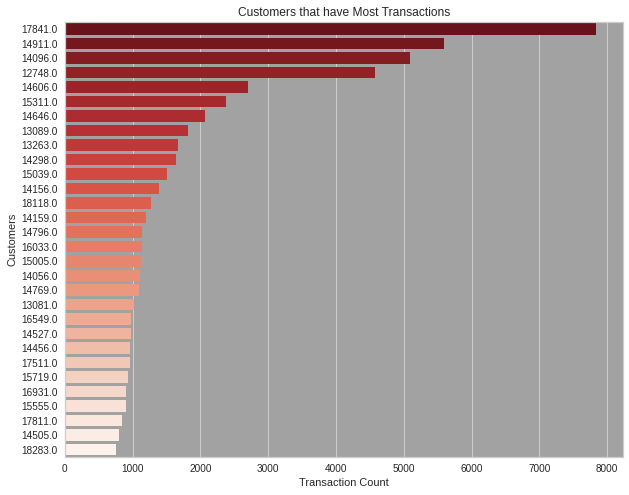

In [ ]:
customer_counts=df.CustomerID.value_counts().sort_values(ascending=False).head(30)
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(y=customer_counts.index,x=customer_counts.values,orient='h',ax=ax,order=customer_counts.index,palette='Reds_r')
plt.title("Customers that have Most Transactions")
plt.ylabel("Customers")
plt.xlabel("Transaction Count")
plt.show()

In [ ]:
df.Country.value_counts()

United Kingdom          354005
Germany                   8659
France                    8034
EIRE                      7138
Spain                     2423
Netherlands               2326
Belgium                   1935
Switzerland               1811
Portugal                  1425
Australia                 1184
Norway                    1049
Channel Islands            744
Italy                      741
Finland                    647
Cyprus                     612
Sweden                     428
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     248
Unspecified                244
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
RSA                         57
European Community          57
Lebanon                     45
Lithuani

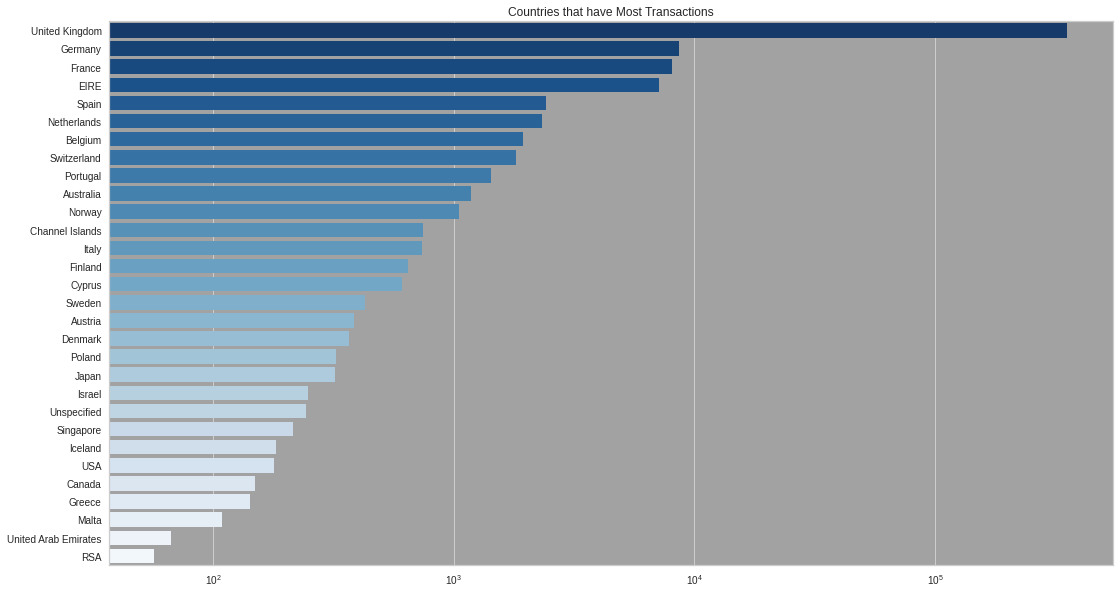

In [ ]:
country_counts=df.Country.value_counts().sort_values(ascending=False).head(30)
fig,ax=plt.subplots(figsize=(18,10))
sns.barplot(y=country_counts.index,x=country_counts.values,orient='h',ax=ax,order=country_counts.index,palette='Blues_r')
plt.title("Countries that have Most Transactions")
plt.xscale("Log")
plt.show()

In [ ]:
df['UnitPrice'].describe()

count    396370.000000
mean          2.867983
std           4.264566
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

***Unit Price Shoud not be 0***

In [ ]:
df[df.UnitPrice==0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
9302,537197,22841,round cake tin vintage green,1,12/5/2010 14:02,0.0,12647.0,Germany,0
33576,539263,22580,advent calendar gingham sack,4,12/16/2010 14:36,0.0,16560.0,United Kingdom,0
40089,539722,22423,regency cakestand 3 tier,10,12/21/2010 13:45,0.0,14911.0,EIRE,0
47068,540372,22090,paper bunting retrospot,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0
47070,540372,22553,plasters in tin skulls,24,1/6/2011 16:41,0.0,13081.0,United Kingdom,0


*There is No Pattern, So we remove it.*

In [ ]:
print("We had {} Observations Previously.".format(df.shape[0]))
df=df[df.UnitPrice>0]
print("Currently, We are having {} Observations after Removing Records that have 0 Unit Price.".format(df.shape[0]))

We had 396370 Observations Previously.
Currently, We are having 396337 Observations after Removing Records that have 0 Unit Price.


*We have Removed 33 Records*

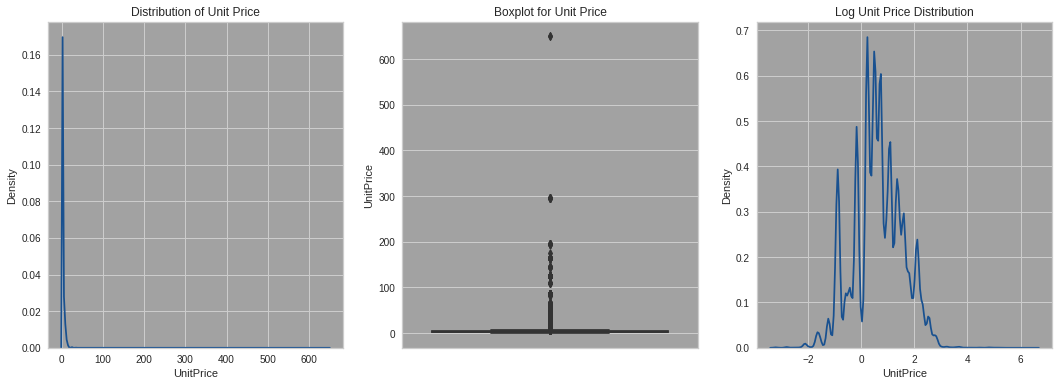

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
sns.kdeplot(df["UnitPrice"],ax=axes[0],color="#195190").set_title("Distribution of Unit Price")
sns.boxplot(y=df["UnitPrice"],ax=axes[1],color="#195190").set_title("Boxplot for Unit Price")
sns.kdeplot(np.log(df["UnitPrice"]),ax=axes[2],color="#195190").set_title("Log Unit Price Distribution")
plt.show()

In [ ]:
print("Lower Limit for UnitPrice: "+str(np.exp(-2)))
print("Upper Limit for UnitPrice: "+str(np.exp(3)))

Lower Limit for UnitPrice: 0.1353352832366127
Upper Limit for UnitPrice: 20.085536923187668


In [ ]:
np.quantile(df.UnitPrice,0.99)

12.75

In [ ]:
print("We had {} Observations Previously.".format(df.shape[0]))
df=df[(df.UnitPrice>0.1)&(df.UnitPrice<20)]
print("Currently, We are having {} Observations after Removing Unit Prices Smaller than 0.1 and Greater than 20.".format(df.shape[0]))

We had 396337 Observations Previously.
Currently, We are having 395385 Observations after Removing Unit Prices Smaller than 0.1 and Greater than 20.


*We have Removed 952 Records*

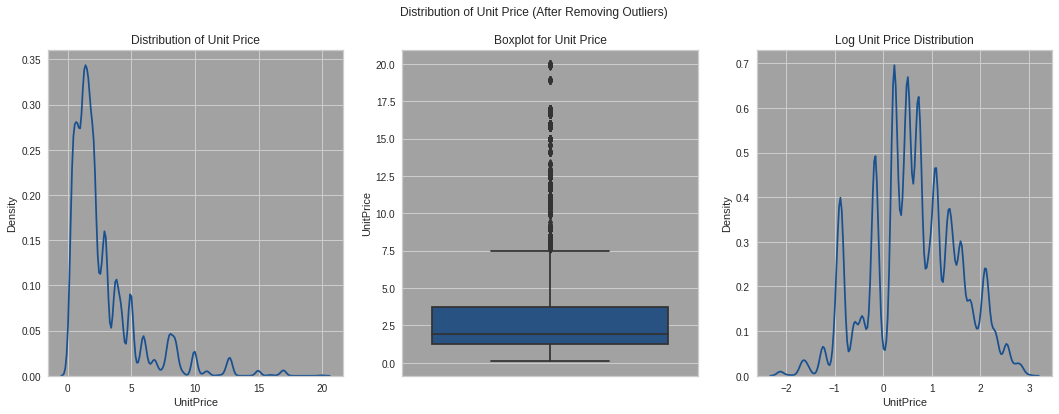

In [ ]:
fig,axes= plt.subplots(1,3,figsize=(18,6))
sns.kdeplot(df["UnitPrice"],ax=axes[0],color="#195190").set_title("Distribution of Unit Price")
sns.boxplot(y=df["UnitPrice"],ax=axes[1],color="#195190").set_title("Boxplot for Unit Price")
sns.kdeplot(np.log(df["UnitPrice"]),ax=axes[2],color="#195190").set_title("Log Unit Price Distribution")
fig.suptitle("Distribution of Unit Price (After Removing Outliers)")
plt.show()

In [ ]:
df["Quantity"].describe()

count    395385.000000
mean         12.946075
std         179.665683
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

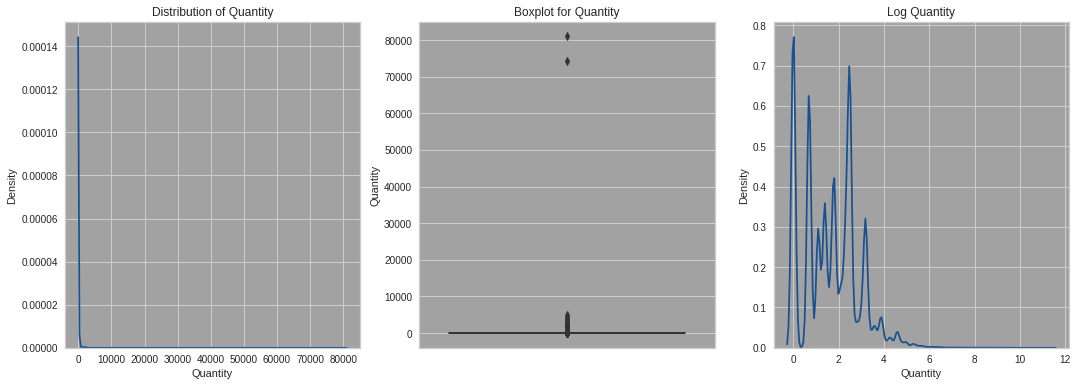

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
sns.kdeplot(df["Quantity"],ax=axes[0],color="#195190").set_title("Distribution of Quantity")
sns.boxplot(y=df["Quantity"],ax=axes[1],color="#195190").set_title("Boxplot for Quantity")
sns.kdeplot(np.log(df["Quantity"]),ax=axes[2],color="#195190").set_title("Log Quantity")
plt.show()

In [ ]:
print("Upper Limit for Quantity: "+str(np.exp(5)))

Upper Limit for Quantity: 148.4131591025766


In [ ]:
np.quantile(df.Quantity,0.99)

120.0

In [ ]:
print("We had {} Observations Previously.".format(df.shape[0]))
df=df[(df.Quantity<150)]
print("Currently, We are having {} Observations after Removing Quantities Greater than 150.".format(df.shape[0]))

We had 395385 Observations Previously.
Currently, We are having 392735 Observations after Removing Quantities Greater than 150.


We have Removed 2,650 Records

In [ ]:
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392735, dtype: datetime64[ns]

In [ ]:
df.drop("Cancelled",axis=1,inplace=True)

In [ ]:
df.shape

(392735, 9)

**Initially it has 5,41,910 Records, but now it has Only 3,92,735 Records.**

*It means that 1,49,175 Records has been Successfully removed.*

In [ ]:
df.to_csv("Online_Retail_Cleaned.csv",index=False)

## **3.) Cohort Analysis**

**A Cohort simply means that a Group of People they have same Characteristics.** We have three types in it and they are,

*   ***Time Cohorts*** or ***Acquisition Cohorts***: Groups are divided by First Activity.
*   ***Behavior Cohorts*** or ***Segment-Based Cohorts***: Groups are divided by their Behaivors and Actions about your Service.
*   ***Size Cohorts***: Size-Based Cohorts refer to the various sizes of Customers who purchase a company’s Products or Services.

*Cohort Analysis is a subset of Behavioral Analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for Analysis. These related Groups, or Cohorts, usually share common characteristics or experiences within a defined Time-Span.*

In [ ]:
print("Minimum Date: {} \nMaximum Date: {}".format(df.InvoiceDate.min(),df.InvoiceDate.max()))
print("Time Difference is: {}".format(df.InvoiceDate.max()-df.InvoiceDate.min()))

Minimum Date: 2010-12-01 08:26:00 
Maximum Date: 2011-12-09 12:50:00
Time Difference is: 373 days 04:24:00


*Our Dataset contains Invoice Records for more than One Year. Let's Apply Cohort Analysis. We can create Monthly Cohorts. We will Group Customers for first Invoice Record. Cohort Index will be number of months since First Transaction.*

In [ ]:
def get_month(x):
    return dt.datetime(x.year,x.month,1) 
def get_dates(df,col):
    year=df[col].dt.year
    month=df[col].dt.month
    day=df[col].dt.day
    return year,month,day

In [ ]:
df["InvoiceMonth"]=df["InvoiceDate"].apply(get_month)
df["CohortMonth"]=df.groupby("CustomerID")["InvoiceMonth"].transform("min")

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth,CohortMonth
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [ ]:
invoice_year,invoice_month,invoice_day=get_dates(df,"InvoiceMonth")
cohort_year,cohort_month,cohort_day=get_dates(df,"CohortMonth")
year_diff=invoice_year-cohort_year
month_diff=invoice_month-cohort_month
df["CohortIndex"]=12*year_diff+month_diff+1

In [ ]:
cohort_data=df.groupby(["CohortIndex","CohortMonth"])["CustomerID"].nunique().reset_index()
cohort_pivot=cohort_data.pivot(index="CohortMonth",columns="CohortIndex",values="CustomerID")
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,874.0,319.0,280.0,329.0,317.0,350.0,316.0,303.0,304.0,345.0,327.0,440.0,231.0
2011-01-01,409.0,91.0,112.0,94.0,131.0,119.0,103.0,100.0,123.0,135.0,151.0,48.0,NaN
2011-02-01,375.0,68.0,69.0,103.0,100.0,90.0,94.0,100.0,92.0,115.0,25.0,NaN,NaN
2011-03-01,450.0,66.0,111.0,90.0,101.0,75.0,119.0,104.0,124.0,38.0,NaN,NaN,NaN
2011-04-01,297.0,64.0,61.0,61.0,56.0,68.0,65.0,77.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,280.0,55.0,48.0,49.0,59.0,65.0,75.0,26.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,240.0,42.0,38.0,64.0,54.0,78.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,189.0,34.0,39.0,42.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,170.0,32.0,41.0,41.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Above Data is our Cohort Table. Its Interpretation is simple. For example, We have 874 unique customer with their first transaction is in 2010-12. Its Cohort Month is 2010-12 and Cohort Index is 1. Go on the one right cell, it is 319. Its mean, 319 unique customer retain their customership for next month.*

### 3.1) Retention Rate

*Retention Tables show a group of people that visited your site or used your app for the first time during a certain time frame. They also display the progressive ‘drop-off’ or decline in activity over time for that particular group (a Cohort).*

*Marketers can use Retention Tables to Analyze the Quality of users brought by a Marketing campaign and compare it to other sources of Traffic.*

**User Retention Rate = (Number of Active Users across Period / Total Number of Active Users in the Previous Period) × 100**

In [ ]:
cohort_sizes=cohort_pivot.iloc[:,0]
retention=cohort_pivot.divide(cohort_sizes,axis=0)
retention.index=retention.index.strftime("%Y-%m")
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,1.0,0.364989,0.320366,0.376430,0.362700,0.400458,0.361556,0.346682,0.347826,0.394737,0.374142,0.503432,0.264302
2011-01,1.0,0.222494,0.273839,0.229829,0.320293,0.290954,0.251834,0.244499,0.300733,0.330073,0.369193,0.117359,NaN
2011-02,1.0,0.181333,0.184000,0.274667,0.266667,0.240000,0.250667,0.266667,0.245333,0.306667,0.066667,NaN,NaN
2011-03,1.0,0.146667,0.246667,0.200000,0.224444,0.166667,0.264444,0.231111,0.275556,0.084444,NaN,NaN,NaN
2011-04,1.0,0.215488,0.205387,0.205387,0.188552,0.228956,0.218855,0.259259,0.074074,NaN,NaN,NaN,NaN
2011-05,1.0,0.196429,0.171429,0.175000,0.210714,0.232143,0.267857,0.092857,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.175000,0.158333,0.266667,0.225000,0.325000,0.095833,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.179894,0.206349,0.222222,0.264550,0.111111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.188235,0.241176,0.241176,0.129412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


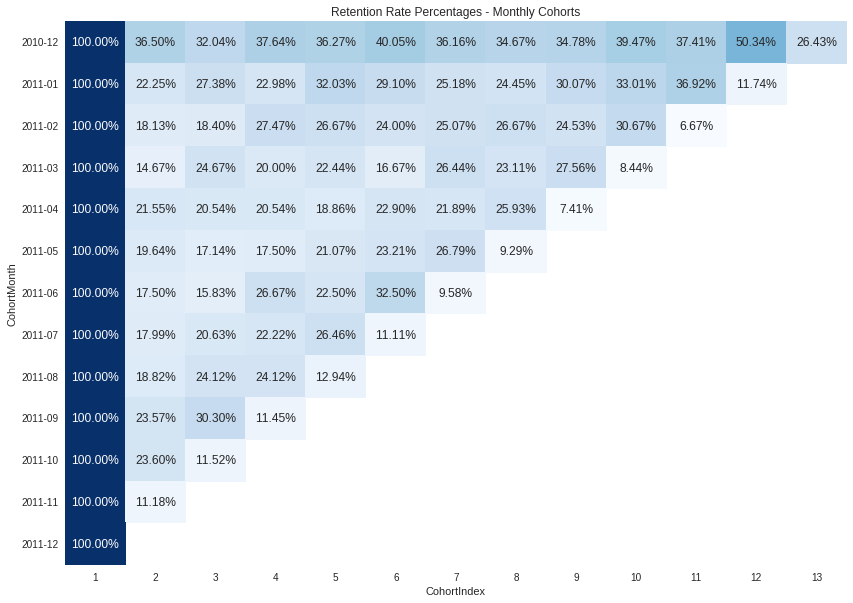

In [ ]:
plt.rcParams["axes.facecolor"]="white"
fig,ax=plt.subplots(figsize=(14,10))
sns.heatmap(retention,cmap="Blues",annot=True,fmt=".2%",annot_kws={"fontsize":12},cbar=False,ax=ax)
plt.title("Retention Rate Percentages - Monthly Cohorts")
plt.yticks(rotation=0)
plt.show()

*In the above chart we get to know about that the 40.05% of Customers that made their First Shopping in January 2011, use this company after Five Months.*

In [ ]:
customer_per_month=df.groupby("CohortMonth")["CustomerID"].nunique().values
customers=customer_per_month.cumsum()
customers=customers[::-1]
customers

array([4298, 4259, 3937, 3581, 3284, 3114, 2925, 2685, 2405, 2108, 1658,
       1283,  874])

In [ ]:
customer_in_month=df.groupby("CohortIndex")["CustomerID"].nunique()
customer_in_month

CohortIndex
1     4298
2      961
3      930
4      907
5      890
6      866
7      795
8      710
9      665
10     633
11     503
12     488
13     231
Name: CustomerID, dtype: int64

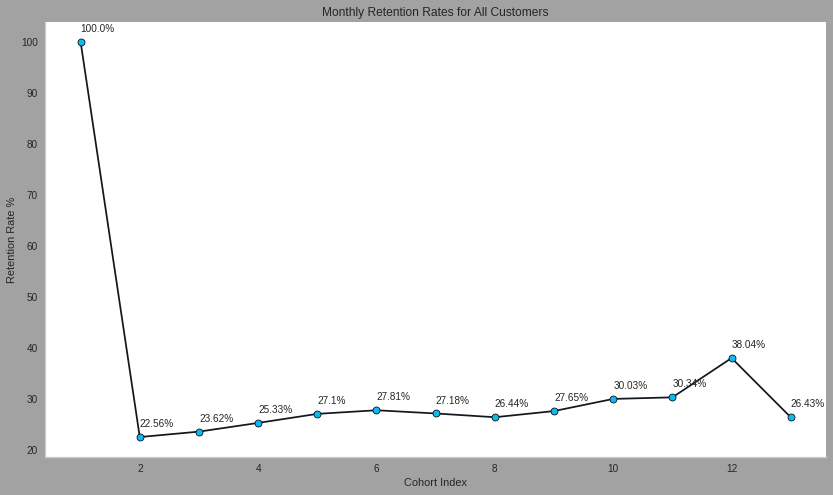

In [ ]:
plt.rcParams["axes.facecolor"]="White"
fig,ax=plt.subplots(figsize=(14,8),facecolor="#A2A2A2")
ax.grid(False)
x=customer_in_month.index
y=100*(customer_in_month/customers)
sns.lineplot(x=x,y=y,color="#101820",marker="o",markerfacecolor="#0EB8F1",markeredgecolor="#000000")
for x,y in zip(x,y):
    plt.text(x,y+2,s=str(round(y,2))+"%")
plt.xlabel("Cohort Index")
plt.ylabel("Retention Rate %")
plt.title("Monthly Retention Rates for All Customers")
sns.despine()
plt.show()

**Retention Rate increases significantly for last months of the Year.**

In [ ]:
monthly_customer_price_df=df.groupby("InvoiceMonth").agg({"TotalPrice":"sum","CustomerID":"nunique"})
monthly_customer_price_df

,TotalPrice,CustomerID
InvoiceMonth,,
2010-12-01,477001.27,874
2011-01-01,402460.88,728
2011-02-01,384935.12,746
2011-03-01,501435.63,959
2011-04-01,389147.37,843
2011-05-01,578653.77,1039
2011-06-01,502033.11,981
2011-07-01,495787.75,937
2011-08-01,512410.08,920


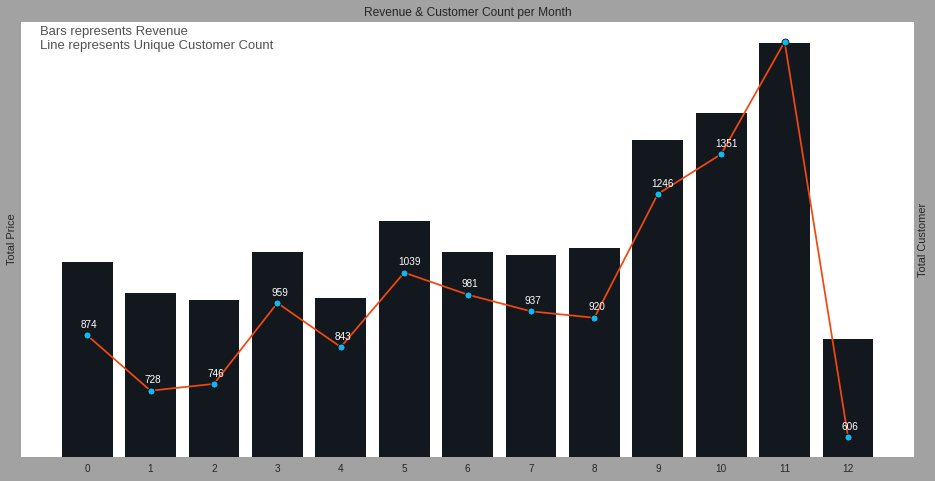

In [ ]:
fig,ax=plt.subplots(figsize=(16, 8),facecolor="#A2A2A2")
ax.set_facecolor("White")
sns.barplot(x=np.arange(len(monthly_customer_price_df.index)),y=monthly_customer_price_df.TotalPrice,ax=ax,color="#101820")
ax2=ax.twinx()
sns.lineplot(x=np.arange(len(monthly_customer_price_df.index)),y=monthly_customer_price_df.CustomerID,ax=ax2,color="#F1480F",marker="o",markerfacecolor="#0EB8F1",markeredgecolor="#000000")
ax.set_yticks([])
ax2.set_yticks([])
ax2.set_ylabel("Total Customer")
ax.set_ylabel("Total Price")
plt.title("Revenue & Customer Count per Month")
ax.text(-0.75,1000000,"Bars represents Revenue \nLine represents Unique Customer Count",fontsize=13,alpha=0.8)
for x,y in zip(np.arange(len(monthly_customer_price_df.index)),monthly_customer_price_df.CustomerID):
    ax2.text(x-0.1,y+20,y,color="white")
sns.despine(left=True,right=True,bottom=True,top=True)
plt.show()

## **4.) Pareto Principle**

**The Pareto principle states that for many outcomes, roughly 80% of consequences come from 20% of causes (the “Vital Few”).**

*Other names for this principle are the 80/20 rule, the law of the vital few, or the principle of factor sparsity.*

**Lets implement Pareto's 80-20 rule to our dataset.** 

We have two hypothesis:

1.   80% of Company's Revenue comes from 20% of Total Customers.
2.   80% of Company's Revenue comes from 20% of Total Products.

**To check these hypothesis, we need only two things.**

*   Individual Sale Records for Customer/Product
*   Calculating Cumulative Sum for them.

We define below functions for Calculation and Visualization.

*  **prepare_pareto_data** finds individual revenue per customer/product and calculates cumulative percentage of them.

*  **create_pareto_plot** takes output from these data and visualize it.

In [ ]:
def prepare_pareto_data(df,col,price):
    df_price=pd.DataFrame(df.groupby(col)[price].sum())
    df_price=df_price.sort_values(price,ascending=False)
    df_price["CumulativePercentage"]=(df_price[price].cumsum()/df_price[price].sum()*100).round(2)
    return df_price

In [ ]:
def create_pareto_plot(df,col,price,log=True):
    plt.rcParams["axes.facecolor"]="White"
    fig,ax=plt.subplots(figsize=(15,5),dpi=150,facecolor="#A2A2A2")
    plt.rcParams["axes.grid"]=False
    if log==True:
        sns.barplot(x=np.arange(len(df)),y=np.log(df[price]),ax=ax,color="#101820")
        ax.set_ylabel("Total Price (Log - Scale)")
    else:
        sns.barplot(x=np.arange(len(df)),y=df[price],ax=ax,color="#101820")
    ax2=ax.twinx()
    sns.lineplot(x=np.arange(len(df)),y=df.CumulativePercentage,ax=ax2,color="#0019AA")
    ax2.axhline(80,color="#008878",linestyle="dashed",alpha=1)
    ax2.axhline(90,color="#008878",linestyle="dashed",alpha=0.75)
    vlines=[int(len(df)*x/10)for x in range(1, 10)]
    for vline in vlines: 
        ax2.axvline(vline,color="#008878",linestyle="dashed",alpha=0.1)    
    interaction_80=(df.shape[0]-df[df.CumulativePercentage>=80].shape[0])
    ax2.axvline(interaction_80,color="#008878",linestyle="dashed",alpha=1)
    interaction_80_percentage=round((interaction_80/df.shape[0])*100)
    plt.text(interaction_80+25,95,str(interaction_80_percentage)+"%")   
    prop=dict(arrowstyle="-|>",color="#000000",lw=1.5,ls="--")
    plt.annotate("",xy=(interaction_80-10,80),xytext=(interaction_80+120,73),arrowprops=prop)
    interaction_90=(df.shape[0]-df[df.CumulativePercentage>=90].shape[0])
    ax2.axvline(interaction_90,color="#008878",linestyle="dashed",alpha=0.8)
    interaction_90_percentage=round((interaction_90/df.shape[0])*100)
    plt.text(interaction_90+25,95,str(interaction_90_percentage)+"%")   
    plt.annotate("",xy=(interaction_90-10,90),xytext=(interaction_90+120,83),arrowprops=prop)
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax.set_yticks([])
    plt.xticks([])
    ax.set_ylabel("Revenue")
    ax2.set_ylabel("Cumulative Percentage")
    subject="Customers" if col=="CustomerID" else "Products"
    plt.title("Pareto Chart for "+subject)
    ax.set_xlabel(subject)
    sns.despine(left=True,right=True,bottom=True,top=True)
    plt.show()

### 4.1) Pareto Chart for Customers

In [ ]:
customer_price=prepare_pareto_data(df,"CustomerID","TotalPrice")
customer_price.head(15)

,TotalPrice,CumulativePercentage
CustomerID,,
14646.0,189796.00,2.65
14911.0,129795.43,4.46
12415.0,81455.09,5.60
14156.0,81329.92,6.73
18102.0,80619.70,7.86
17511.0,78595.72,8.95
15311.0,57178.46,9.75
13089.0,56618.82,10.54
14096.0,52147.65,11.27


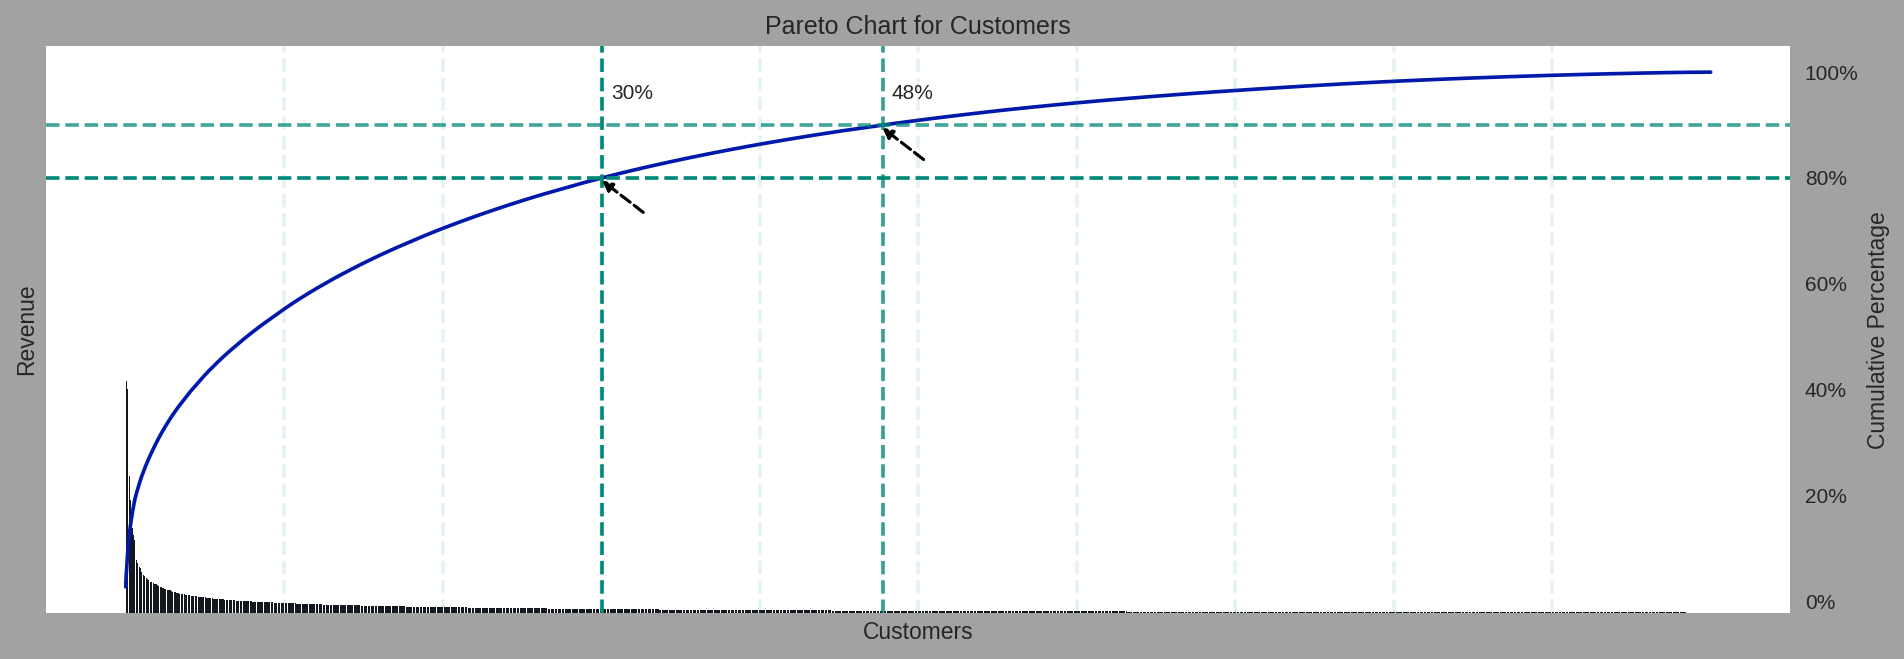

In [ ]:
create_pareto_plot(customer_price,"CustomerID","TotalPrice",log=False)

*We can also Plot it in Log Scale. It helps us for Better Visualization.*

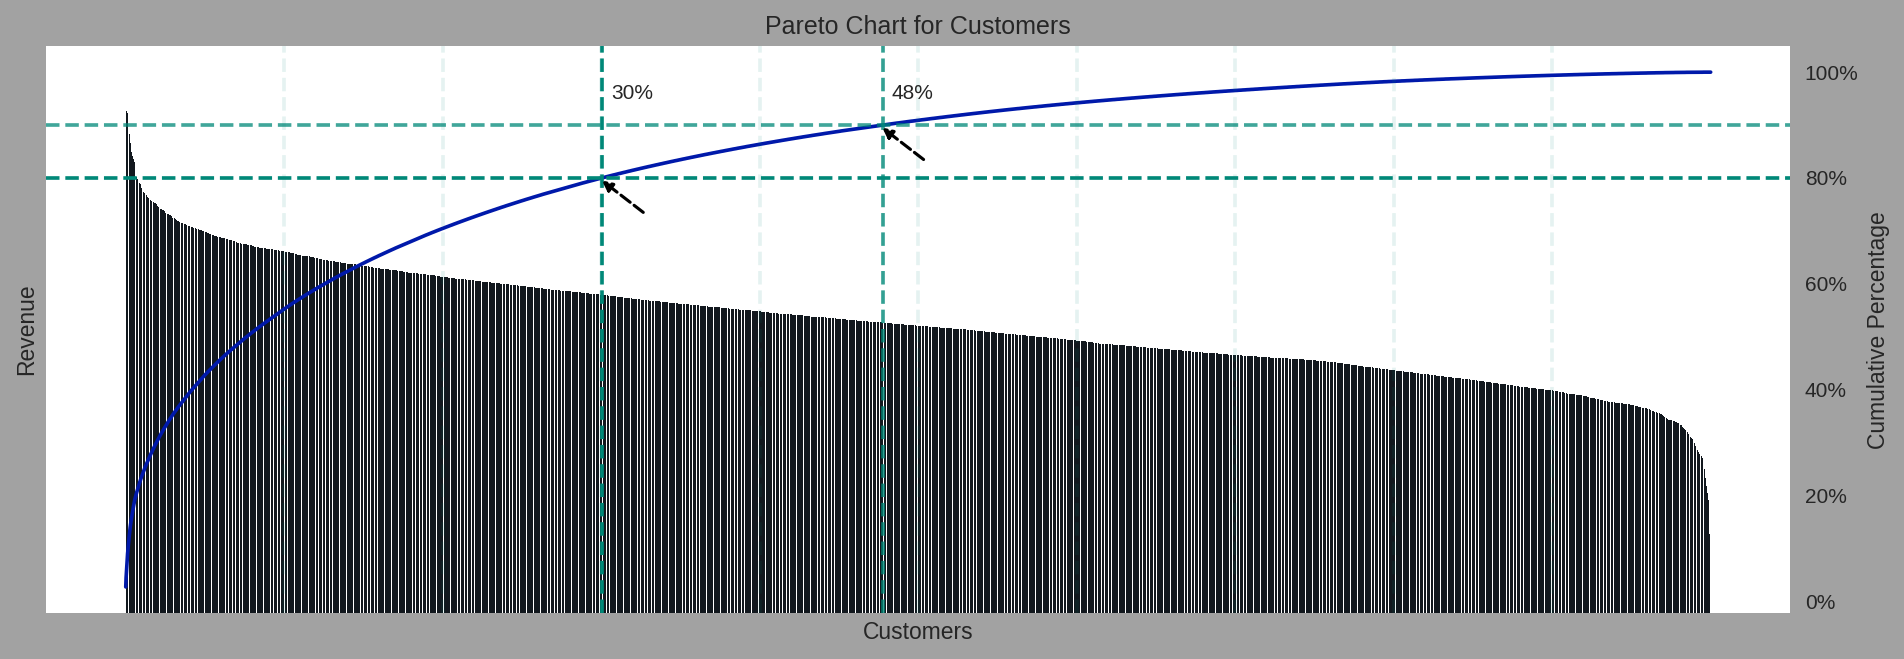

In [ ]:
create_pareto_plot(customer_price,"CustomerID","TotalPrice",log=True)

***We can see that 80% of company's revenue comes from top 30% of Customers. Also, 90% of company's revenue comes from top 48% of Customers.***

### 4.2) Pareto Chart for Products

In [ ]:
item_price=prepare_pareto_data(df,"StockCode","TotalPrice")
item_price.head(15)

,TotalPrice,CumulativePercentage
StockCode,,
22423,132100.75,1.84
85123A,68282.78,2.80
47566,61166.83,3.65
85099B,57382.08,4.45
79321,37464.27,4.97
84879,37428.74,5.50
22086,35337.23,5.99
23298,31210.55,6.42
22960,30038.77,6.84


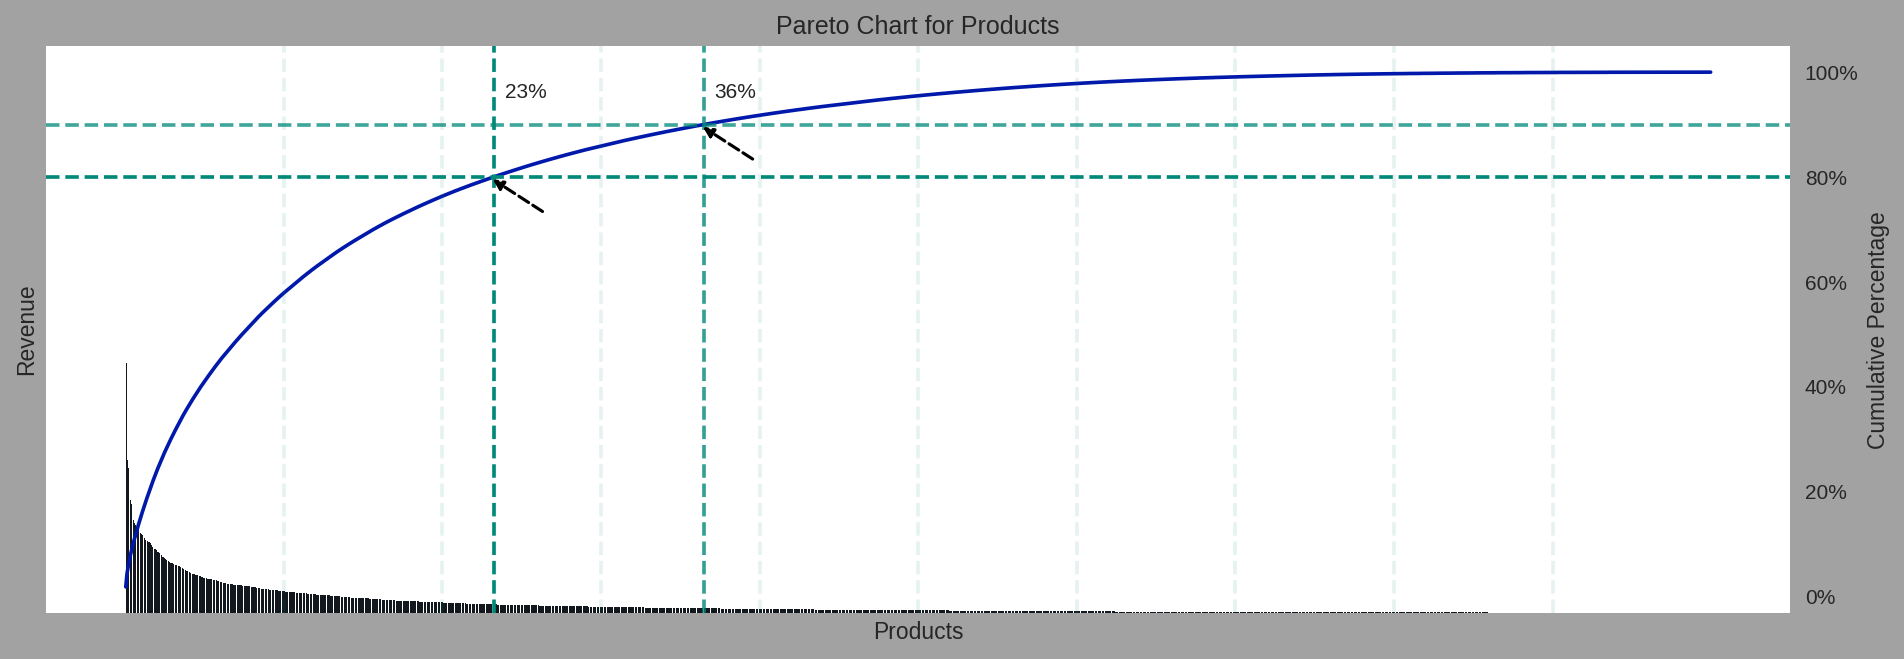

In [ ]:
create_pareto_plot(item_price,"StockCode","TotalPrice",log=False)

*We can also Plot it in Log Scale. It helps us for Better Visualization.*

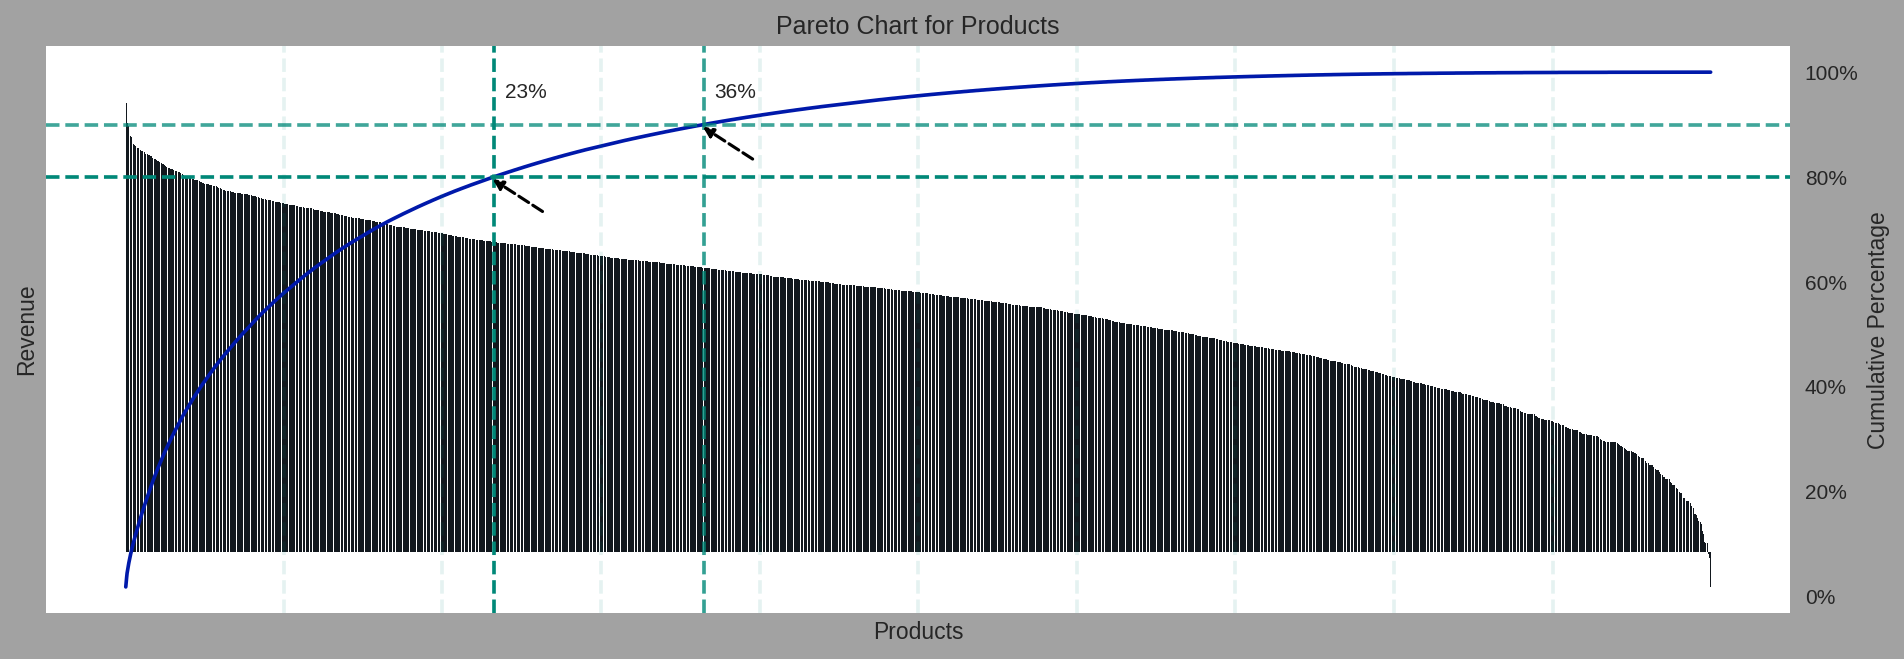

In [ ]:
create_pareto_plot(item_price,"StockCode","TotalPrice",log=True)

**We can see that 80% of company's revenue comes from top 23% of Products. Also, 90% of company's revenue comes from top 36% of Products.**

In [ ]:
top_customers=customer_price[customer_price.CumulativePercentage<=80].index.tolist()
products_for_top_customers=df[df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()
products_for_other_customers=df[~df.CustomerID.isin(top_customers)].Description.drop_duplicates().values.tolist()
print(top_customers)
print(products_for_top_customers)
print(products_for_other_customers)

[14646.0, 14911.0, 12415.0, 14156.0, 18102.0, 17511.0, 15311.0, 13089.0, 14096.0, 14088.0, 14298.0, 13694.0, 15061.0, 17841.0, 13798.0, 17450.0, 16684.0, 12748.0, 16029.0, 16422.0, 13081.0, 13098.0, 13408.0, 17389.0, 14680.0, 12753.0, 17675.0, 16013.0, 15039.0, 15838.0, 15159.0, 12731.0, 12471.0, 16839.0, 12921.0, 17428.0, 17677.0, 17404.0, 15856.0, 15189.0, 14051.0, 13767.0, 13777.0, 15513.0, 16705.0, 16133.0, 14031.0, 15498.0, 12477.0, 13881.0, 17735.0, 12433.0, 16525.0, 12681.0, 14866.0, 17340.0, 12621.0, 12678.0, 15640.0, 14606.0, 14258.0, 12540.0, 13078.0, 14194.0, 12409.0, 14895.0, 15125.0, 13319.0, 17581.0, 12682.0, 14769.0, 16779.0, 12971.0, 13113.0, 17865.0, 17107.0, 15615.0, 17139.0, 16180.0, 13340.0, 17706.0, 14062.0, 16843.0, 15251.0, 15078.0, 13458.0, 14733.0, 15482.0, 12709.0, 16523.0, 14607.0, 14367.0, 14667.0, 12451.0, 12590.0, 15769.0, 13090.0, 13488.0, 13001.0, 16033.0, 13969.0, 17243.0, 12744.0, 17017.0, 14527.0, 17949.0, 12567.0, 16558.0, 14056.0, 15358.0, 14936.0, 

## **5.) RFM Analysis**

**Recency, Frequency, Monetary Value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures.** The RFM model is based on three quantitative factors:

**Recency:** *How recently a customer has made a purchase.*

**Frequency:** *How often a customer makes a purchase.*

**Monetary Value:** *How much money a customer spends on purchases.*

RFM analysis numerically ranks a customer in each of these three categories, generally on a scale of 1 to 5 (the higher the number, the better the result). The "best" customer would receive a top score in every category.

*Let's perform RFM Analysis on our Data.*

### 5.1) Preparing RFM Table

In [ ]:
print("Min date: {} \nMax date: {}".format(df.InvoiceDate.min(),df.InvoiceDate.max()))

Min date: 2010-12-01 08:26:00 
Max date: 2011-12-09 12:50:00


In [ ]:
last_day=df.InvoiceDate.max()+dt.timedelta(days=1)

In [ ]:
rfm_table = df.groupby("CustomerID").agg({"InvoiceDate":lambda x:(last_day-x.max()).days,"InvoiceNo":"nunique","TotalPrice":"sum"})
rfm_table.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","TotalPrice":"Monetary"},inplace=True)
rfm_table.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,7,4060.40
12348.0,75,4,1437.24
12349.0,19,1,1417.60
12350.0,310,1,294.40
12352.0,36,7,1385.74
12353.0,204,1,89.00
12354.0,232,1,1079.40
12355.0,214,1,459.40
12356.0,23,3,2487.43


In [ ]:
r_labels=range(5,0,-1)
fm_labels=range(1,6)
rfm_table["R"]=pd.qcut(rfm_table["Recency"],5,labels=r_labels)
rfm_table["F"]=pd.qcut(rfm_table["Frequency"].rank(method='first'),5,labels=fm_labels)
rfm_table["M"]=pd.qcut(rfm_table["Monetary"],5,labels=fm_labels)
rfm_table.head(10)

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347.0,2,7,4060.40,5,5,5
12348.0,75,4,1437.24,2,4,4
12349.0,19,1,1417.60,4,1,4
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1385.74,3,5,4
12353.0,204,1,89.00,1,1,1
12354.0,232,1,1079.40,1,1,4
12355.0,214,1,459.40,1,1,2
12356.0,23,3,2487.43,4,3,5


In [ ]:
rfm_table["RFM_Segment"]=rfm_table["R"].astype(str)+rfm_table["F"].astype(str)+rfm_table["M"].astype(str)
rfm_table["RFM_Score"]=rfm_table[["R","F","M"]].sum(axis=1)
rfm_table.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15
12348.0,75,4,1437.24,2,4,4,244,10
12349.0,19,1,1417.60,4,1,4,414,9
12350.0,310,1,294.40,1,1,2,112,4
12352.0,36,7,1385.74,3,5,4,354,12
12353.0,204,1,89.00,1,1,1,111,3
12354.0,232,1,1079.40,1,1,4,114,6
12355.0,214,1,459.40,1,1,2,112,4
12356.0,23,3,2487.43,4,3,5,435,12


### 5.2) RFM Segments

**Champions:** *Bought recently, buy often and spend the most.*

**Loyal customers:** *Buy on a regular basis. Responsive to promotions.*

**Potential loyalist:** *Recent customers with average frequency.*

**Recent customers:** *Bought most recently, but not often.*

**Promising:** *Recent shoppers, but haven’t spent much.*

**Needs attention:** *Above average recency, frequency and monetary values. May not have bought very recently though.*

**About to sleep:** *Below average recency and frequency. Will lose them if not reactivated.*

**At risk:** *Some time since they’ve purchased. Need to bring them back!*

**Can’t lose them:** *Used to purchase frequently but haven’t returned for a long time.*

**Hibernating:** *Last purchase was long back and low number of orders. May be lost.*

In [ ]:
segt_map={
    r'[1-2][1-2]':'Hibernating',
    r'[1-2][3-4]':'At-Risk',
    r'[1-2]5':'Cannot Lose Them',
    r'3[1-2]':'About To Sleep',
    r'33':'Need Attention',
    r'[3-4][4-5]':'Loyal Customers',
    r'41':'Promising',
    r'51':'New Customers',
    r'[4-5][2-3]':'Potential Loyalists',
    r'5[4-5]':'Champions'
}
rfm_table['Segment']=rfm_table['R'].astype(str)+rfm_table['F'].astype(str)
rfm_table['Segment']=rfm_table['Segment'].replace(segt_map,regex=True)
rfm_table.head(10)

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Segment
CustomerID,,,,,,,,,
12347.0,2,7,4060.40,5,5,5,555,15,Champions
12348.0,75,4,1437.24,2,4,4,244,10,At-Risk
12349.0,19,1,1417.60,4,1,4,414,9,Promising
12350.0,310,1,294.40,1,1,2,112,4,Hibernating
12352.0,36,7,1385.74,3,5,4,354,12,Loyal Customers
12353.0,204,1,89.00,1,1,1,111,3,Hibernating
12354.0,232,1,1079.40,1,1,4,114,6,Hibernating
12355.0,214,1,459.40,1,1,2,112,4,Hibernating
12356.0,23,3,2487.43,4,3,5,435,12,Potential Loyalists


### 5.3) Visualizing RFM Grid

In [ ]:
rfm_coordinates={"Champions":[3,5,0.8,1],
                   "Loyal Customers":[3,5,0.4,0.8],
                   "Cannot Lose Them":[4,5,0,0.4],
                   "At-Risk":[2,4,0,0.4],
                   "Hibernating":[0,2,0,0.4],
                   "About To Sleep":[0,2,0.4,0.6],
                   "Promising":[0,1,0.6,0.8],
                   "New Customers":[0,1,0.8,1],
                   "Potential Loyalists":[1,3,0.6,1],
                   "Need Attention":[2,3,0.4,0.6]
                }

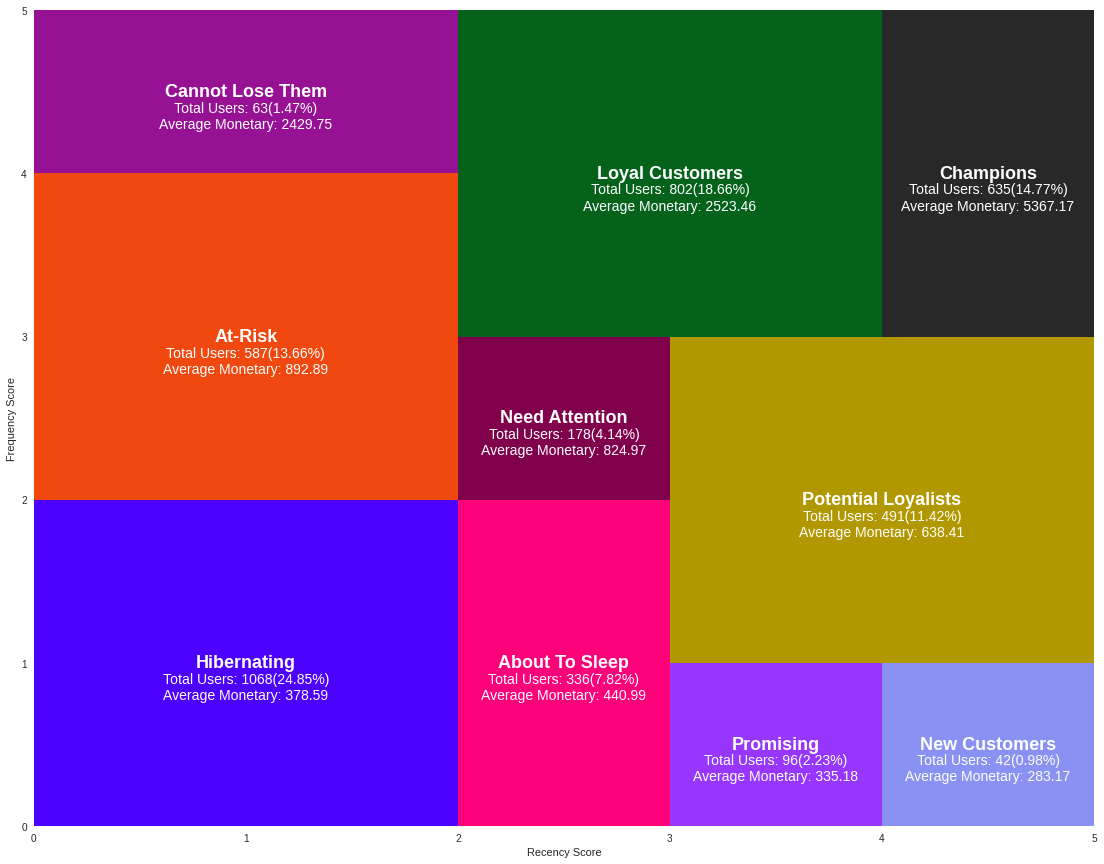

In [ ]:
fig,ax=plt.subplots(figsize=(19,15))
ax.set_xlim([0,5])
ax.set_ylim([0,5])
plt.rcParams["axes.facecolor"]="white"
palette=["#282828","#04621B","#971194","#F1480F","#4C00FF","#FF007B","#9736FF","#8992F3","#B29800","#80004C"]
for key,color in zip(rfm_coordinates.keys(),palette[:10]):
    coordinates=rfm_coordinates[key]
    ymin,ymax,xmin,xmax=coordinates[0],coordinates[1],coordinates[2],coordinates[3]
    ax.axhspan(ymin=ymin,ymax=ymax,xmin=xmin,xmax=xmax,facecolor=color)
    users=rfm_table[rfm_table.Segment==key].shape[0]
    users_percentage=(rfm_table[rfm_table.Segment==key].shape[0]/rfm_table.shape[0])*100
    avg_monetary=rfm_table[rfm_table.Segment==key]["Monetary"].mean()
    user_txt="\n\nTotal Users: "+str(users)+"("+str(round(users_percentage,2))+"%)"
    monetary_txt="\n\n\n\nAverage Monetary: "+str(round(avg_monetary,2))
    x=5*(xmin+xmax)/2
    y=(ymin+ymax)/2 
    plt.text(x=x,y=y,s=key,ha="center",va="center",fontsize=18,color="white",fontweight="bold")
    plt.text(x=x,y=y,s=user_txt,ha="center",va="center",fontsize=14,color="white")    
    plt.text(x=x,y=y,s=monetary_txt,ha="center",va="center",fontsize=14,color="white")    
    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")    
sns.despine(left=True,bottom=True)
plt.show()

### 5.4) Visualizing RFM Segments

In [ ]:
rfm_table2=rfm_table.reset_index()
rfm_monetary_size=rfm_table2.groupby("Segment").agg({"Monetary":"mean","CustomerID":"nunique"})
rfm_monetary_size.rename(columns={"Monetary":"MeanMonetary","CustomerID":"CustomerCount"},inplace=True)
rfm_monetary_size=rfm_monetary_size.sort_values("MeanMonetary",ascending=False)

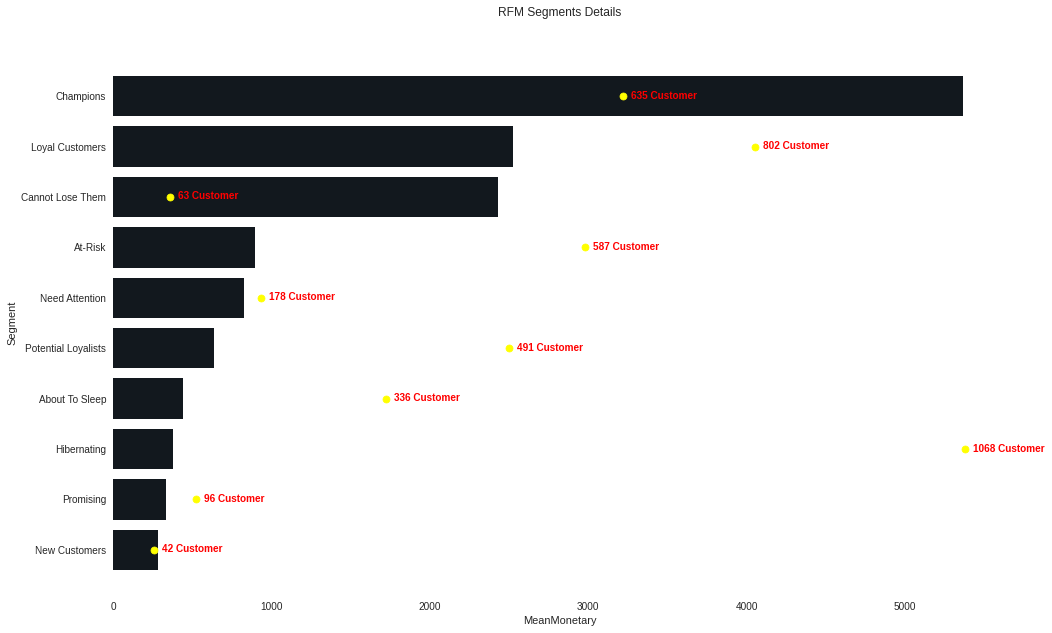

In [ ]:
plt.rcParams["axes.facecolor"]="White"
fig,ax=plt.subplots(figsize=(16,10),facecolor="White")
sns.barplot(x=rfm_monetary_size.MeanMonetary,y=rfm_monetary_size.index,ax=ax,color="#101820")
ax2=ax.twiny()
sns.lineplot(x=rfm_monetary_size.CustomerCount,y=rfm_monetary_size.index,ax=ax2,marker="o",linewidth=0,color="Yellow",markeredgecolor="Yellow")
ax2.axis("off")
for y,x in list(enumerate(rfm_monetary_size.CustomerCount)):
    ax2.text(x+10,y+0.05,str(x)+" Customer",color="Red",fontweight="bold")
plt.title("RFM Segments Details")
sns.despine(left=True,right=True,bottom=True,top=True)
plt.show()

In [ ]:
rfm=rfm_table2.groupby("Segment").agg({"CustomerID":"nunique","Recency":"mean","Frequency":"mean","Monetary":"mean"})
rfm.rename(columns={"CustomerID":"Segment Size"},inplace=True)
cm=sns.light_palette("#A2A2A2",as_cmap=True)
rfm.T.style.background_gradient(cmap=cm,axis=1)\
.set_precision(2)\
.highlight_min(axis=1,color="#195190")\
.highlight_max(axis=1,color="#D60000")

Segment,About To Sleep,At-Risk,Cannot Lose Them,Champions,Hibernating,Loyal Customers,Need Attention,New Customers,Potential Loyalists,Promising
Segment Size,336.00,587.00,63.00,635.00,1068.00,802.00,178.00,42.00,491.00,96.00
Recency,53.06,152.81,134.65,6.01,216.59,33.30,52.03,7.17,17.18,23.55
Frequency,1.14,2.85,8.30,12.04,1.09,6.39,2.30,1.00,1.99,1.00
Monetary,440.99,892.89,2429.75,5367.17,378.59,2523.46,824.97,283.17,638.41,335.18


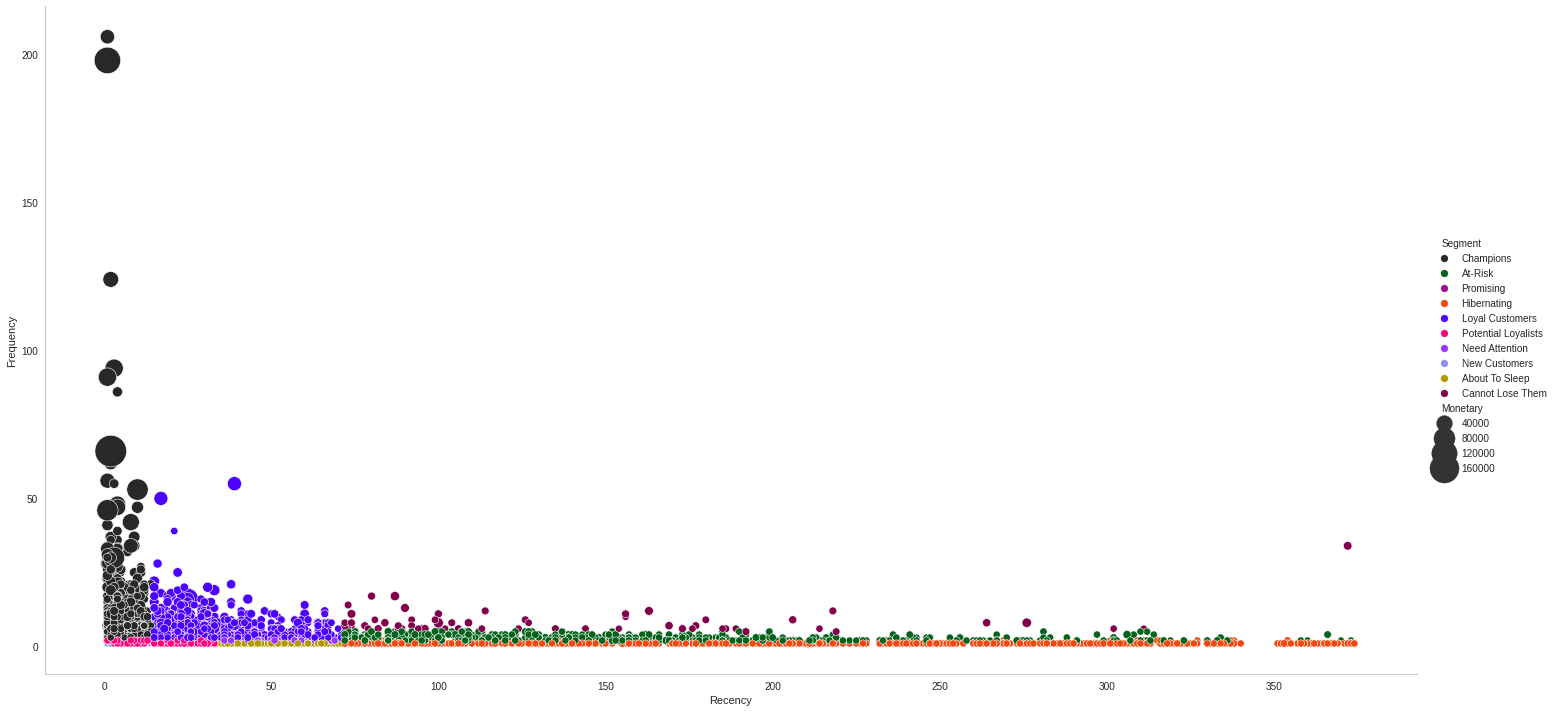

In [ ]:
plt.rcParams["axes.facecolor"]="White"
plt.rcParams["axes.grid"]=False
sns.relplot(x="Recency",y="Frequency",size="Monetary",hue="Segment",data=rfm_table2,palette=palette,height=10,aspect=2,sizes=(50,1000))
plt.show()

In [ ]:
monetary_per_segment=(rfm_table2.groupby("Segment")["Monetary"].sum() /\
rfm_table2.groupby("Segment")["Monetary"].sum().sum()).sort_values(ascending=False)

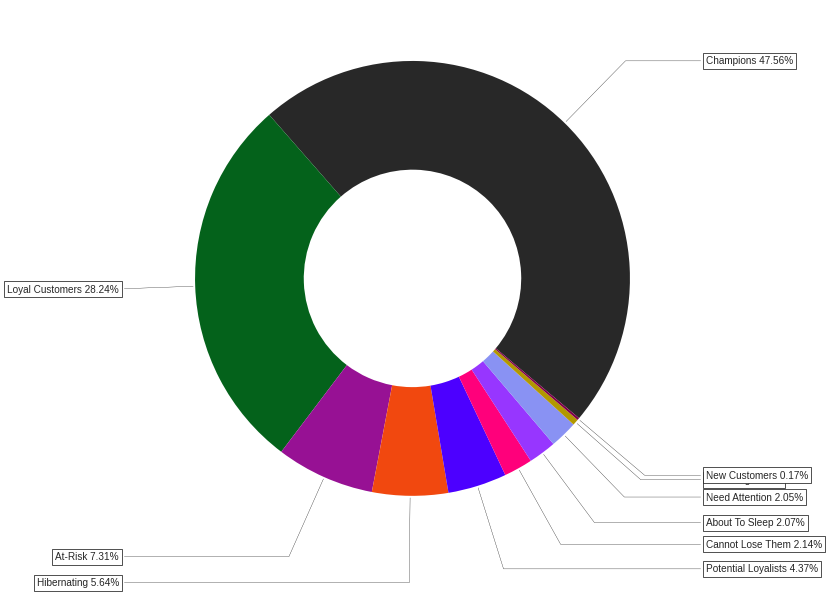

In [ ]:
fig,ax=plt.subplots(figsize=(10,10),facecolor="White")
wedges,texts=ax.pie(monetary_per_segment.values,wedgeprops=dict(width=0.5),startangle=-40,colors=palette)
bbox_props=dict(boxstyle="square,pad=0.3",fc="w",ec="k",lw=0.72)
kw=dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props,zorder=0,va="center")
for i,p in enumerate(wedges):
    ang=(p.theta2-p.theta1)/2.+p.theta1
    y=np.sin(np.deg2rad(ang))
    x=np.cos(np.deg2rad(ang))
    horizontalalignment={-1:"right",1:"left"}[int(np.sign(x))]
    connectionstyle="angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle":connectionstyle})
    ax.annotate(monetary_per_segment.index[i]+" "+str(round(monetary_per_segment[i]*100,2))+"%",xy=(x, y),xytext=(1.35*np.sign(x),1.4*y),horizontalalignment=horizontalalignment,**kw)
plt.show()

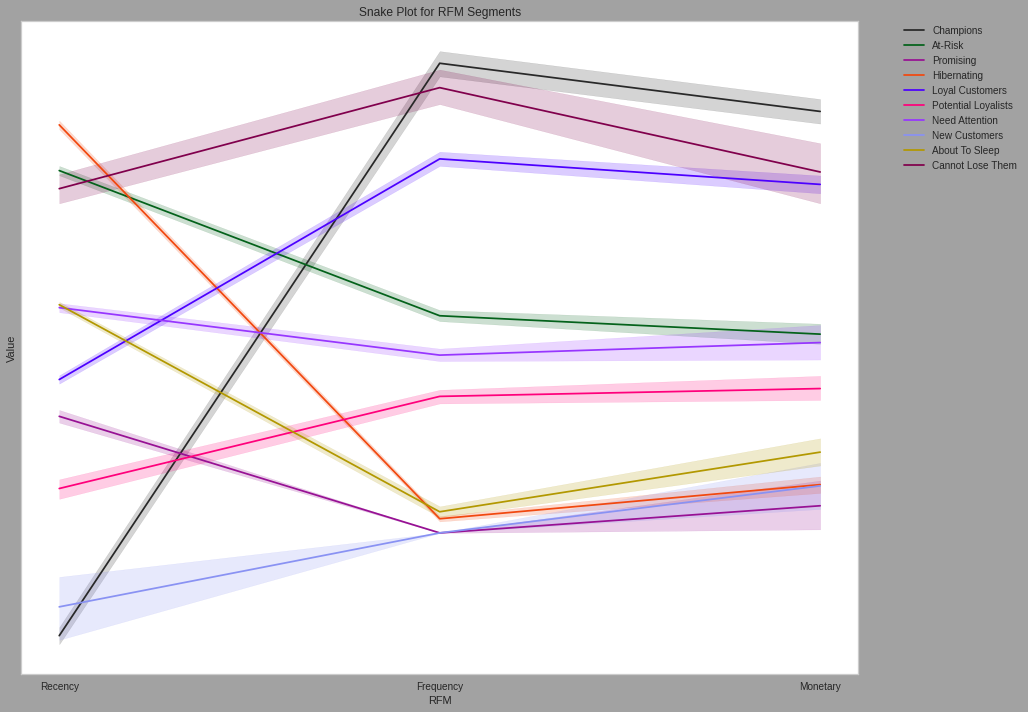

In [ ]:
rfm_clustering=rfm_table2[["Recency","Frequency","Monetary","Segment"]]
for col in ["Recency","Frequency","Monetary"]:
    scaler=StandardScaler()
    rfm_clustering[col]=np.log(rfm_clustering[col])
    rfm_clustering[col]=scaler.fit_transform(rfm_clustering[col].values.reshape(-1,1))
rfm_melted=pd.melt(rfm_clustering,id_vars="Segment",value_vars=["Recency","Frequency","Monetary"],var_name="RFM",value_name="Value")
fig,ax=plt.subplots(figsize=(15, 12),facecolor="#A2A2A2")
ax.set_facecolor("White")
sns.lineplot(x="RFM",y="Value",hue="Segment",data=rfm_melted,palette=palette)
ax.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
ax.set_yticks([])
ax.set_title("Snake Plot for RFM Segments")
plt.show()

### 5.5) Customer Segmentation using RFM Metrics

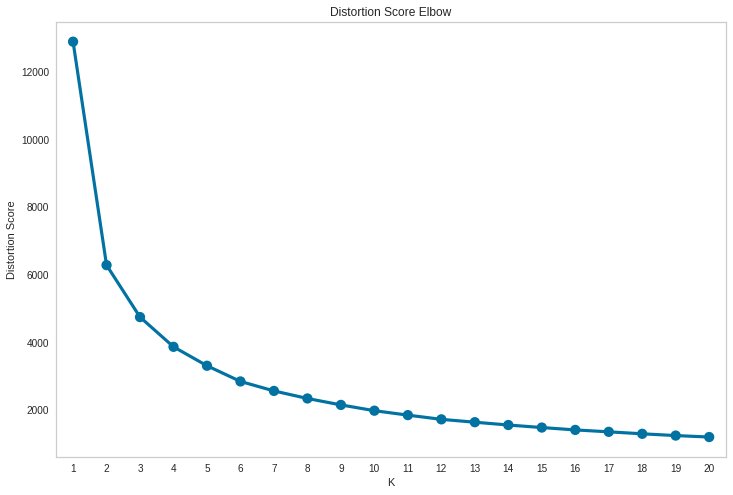

In [ ]:
ds={}
features=["Recency","Frequency","Monetary"]
for k in range(1,21):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(rfm_clustering[features])
    ds[k]=kmeans.inertia_
plt.figure(figsize=(12,8))
plt.title('Distortion Score Elbow')
plt.xlabel('K'); 
plt.ylabel('Distortion Score')
sns.pointplot(x=list(ds.keys()),y=list(ds.values()))
plt.show()

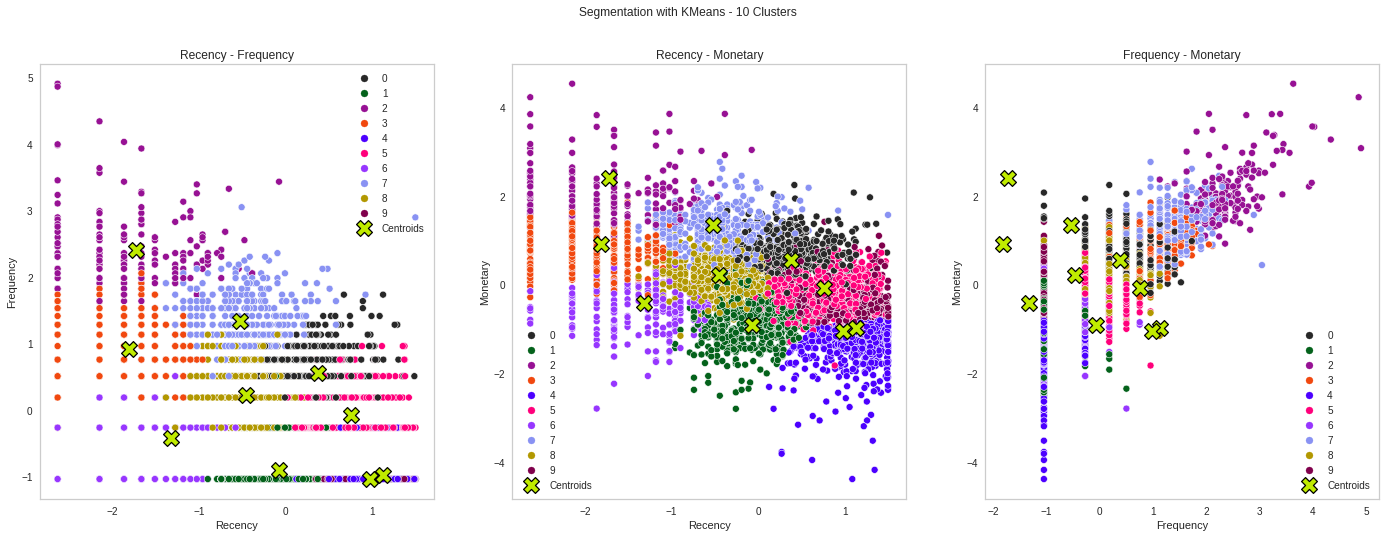

In [ ]:
kmeans=KMeans(n_clusters=10,random_state=42) 
kmeans.fit(rfm_clustering[features])
cluster=kmeans.labels_
fig,axes=plt.subplots(1,3,figsize=(24,8))
for i,feature in list(enumerate(combinations(["Recency","Frequency","Monetary"],2))):
    sns.scatterplot(x=rfm_clustering[feature[0]],y=rfm_clustering[feature[1]],hue=cluster,palette=palette[:len(set(cluster))],ax=axes[i]).set_title(feature[0]+" - "+feature[1])
    sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],s=250,color='#C0EB00',label='Centroids',marker="X",ax=axes[i],edgecolor="black")
plt.suptitle("Segmentation with KMeans - 10 Clusters")
for ax in axes:
    ax.set_facecolor("White")
    ax.grid(False) 
plt.show()

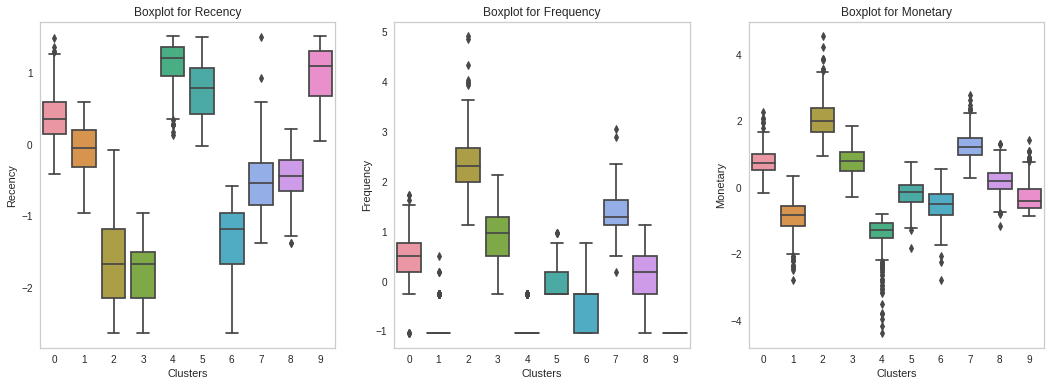

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
for ax in axes:
    ax.set_facecolor("White")
    ax.set_xlabel("Clusters")    
sns.boxplot(x=cluster,y="Recency",data=rfm_clustering,ax=axes[0]).set_title("Boxplot for Recency")
sns.boxplot(x=cluster,y="Frequency",data=rfm_clustering,ax=axes[1]).set_title("Boxplot for Frequency")
sns.boxplot(x=cluster,y="Monetary",data=rfm_clustering,ax=axes[2]).set_title("Boxplot for Monetary")
plt.show()

## **6.) Clustering**

**What is Clustering?**

*   *A way of grouping the data points into different clusters, consisting of 
similar data points.*
*   *Clustering or cluster analysis is a machine learning technique, which groups the unlabelled dataset.*



**What is Davis Bouldin Score?**

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

### 6.1) K-Means Clustering

**What is K-Means Clustering?**
 
*   *K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.*
*   *K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.*
*   *It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.*

In [ ]:
X=rfm_clustering[features]

In [ ]:
num_clusters=2
predictions=kmeans.fit_predict(X)
kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
kmeans.fit(X)
kmeans_score = davies_bouldin_score(X, predictions)
print("The Davies Bouldin Score: {:.5f}".format(kmeans_score))

The Davies Bouldin Score: 1.01487


### 6.2) DBSCAN Clustering

**What is DBScan Clustering?**

*   Density-based spatial clustering of applications with noise (DBSCAN) clustering method. 
*   Clusters are dense regions in the data space, separated by regions of the lower density of points. The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”.
*   The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

In [ ]:
db = DBSCAN(eps=0.8, min_samples=7, metric='euclidean')
db.fit(X) 
predictions=kmeans.fit_predict(X)
dbscan_score = davies_bouldin_score(X, predictions)
print("The Davis Bouldin Score: {:.5f}".format(dbscan_score))

The Davis Bouldin Score: 0.88118


### 6.3) Agglomerative Clustering

**What is Agglomerative Clustering?**

*   The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.
*   The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.
*   The result is a tree-based representation of the objects, named dendrogram.

In [ ]:
agg = AgglomerativeClustering(n_clusters=2)
yhat = agg.fit(X)
yhat_2 = agg.fit_predict(X)
clusters = unique(yhat)
agglo_score = davies_bouldin_score(X, yhat_2)
print("The Davis Bouldin Score: {:.5f}".format(agglo_score))

The Davis Bouldin Score: 0.88087


### 6.4) BIRCH Clustering

**What is BIRCH Clustering?**

*   Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible.
*   This smaller summary is then clustered instead of clustering the larger dataset.
*   BIRCH is often used to complement other clustering algorithms by creating a summary of the dataset that the other clustering algorithm can now use. However, BIRCH has one major drawback – it can only process metric attributes.

In [ ]:
birch = Birch(threshold=0.01, n_clusters=2)
birch.fit(X)
yhat = birch.predict(X)
clusters = unique(yhat)
birch_score = davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(birch_score))

The Davis Bouldin Score: 0.96619


### 6.5) OPTICS Clustering

**What is OPTICS Clustering?**

*   OPTICS (Ordering Points To Identify the Clustering Structure), closely related to DBSCAN, finds core sample of high density and expands clusters from them.
*   Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius.
*   Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.

In [ ]:
optics = OPTICS(eps=0.8, min_samples=10)
yhat = optics.fit_predict(X)
clusters = unique(yhat)
optics_score = davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(optics_score))

The Davis Bouldin Score: 1.77729


### 6.6) Affinity Propagation Clustering

**What is Affinity Propagation Clustering?**

*   Affinity propagation (AP) is a graph based clustering algorithm similar to k Means or K medoids, which does not require the estimation of the number of clusters before running the algorithm.
*   Affinity propagation finds “exemplars” i.e. members of the input set that are representative of clusters.
*   Affinity Propagation is particularly well suited for problems where we don't know the optimal number of clusters.

In [ ]:
affpro = AffinityPropagation(damping=0.9)
affpro.fit(X)
yhat = affpro.predict(X)
clusters = unique(yhat)
affinpro_score = davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(affinpro_score))

The Davis Bouldin Score: 0.97393


### 6.7) Spectral Clustering

**What is Spectral Clustering?**

*   Spectral clustering is an EDA technique that reduces complex multidimensional datasets into clusters of similar data in rarer dimensions.
*   Spectral clustering treats the data clustering as a graph partitioning problem without making any assumption on the form of the data clusters.
*   Spectral clustering is the approach is used to identify communities of nodes in a graph based on the edges connecting them.

In [ ]:
spec = SpectralClustering(n_clusters=2)
yhat = spec.fit_predict(X)
clusters = unique(yhat)
spec_score = davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(spec_score))

The Davis Bouldin Score: 0.86871


### 6.8) Mini-Batch K-Means Clustering

**What is Mini-Batch K-Means Clustering?**

*   Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory.
*   Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence.
*   This approach can significantly reduce the time required for the algorithm to find convergence (i.e. fit the data) with only a small cost in quality.

In [ ]:
mbkm = MiniBatchKMeans(n_clusters=2)
mbkm.fit(X)
yhat = mbkm.predict(X)
clusters = unique(yhat)
mbkmeans_score = davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(mbkmeans_score))

The Davis Bouldin Score: 0.88498


### 6.9) Gaussian Mixture Clustering

**What is Gaussian Mixture Clustering?**

*   Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster.
*   Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.
*   Gaussian Mixture models are used for representing Normally Distributed subpopulations within an overall population.

In [ ]:
gauss_mix=GaussianMixture(n_components=2)
gauss_mix.fit(X)
yhat = gauss_mix.predict(X)
clusters = unique(yhat)
gaussmix_score=davies_bouldin_score(X, yhat)
print("The Davis Bouldin Score: {:.5f}".format(gaussmix_score))

The Davis Bouldin Score: 0.99249


## **7.) Model Comparision**

                             Model     Score
0              Spectral Clustering  0.868714
2         Agglomerative Clustering  0.880871
3                DBSCAN Clustering  0.881184
1    Mini-Batch K-Means Clustering  0.884980
4                 BIRCH Clustering  0.966185
5  Affinity Propagation Clustering  0.973934
6      Gaussian Mixture Clustering  0.992491
7               K-Means Clustering  1.014866
8                OPTICS Clustering  1.777294


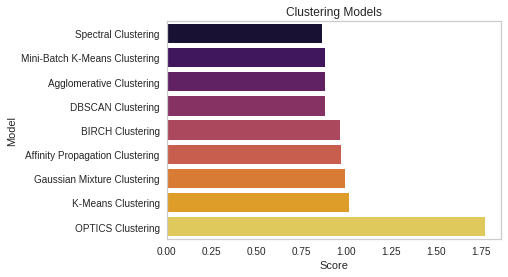

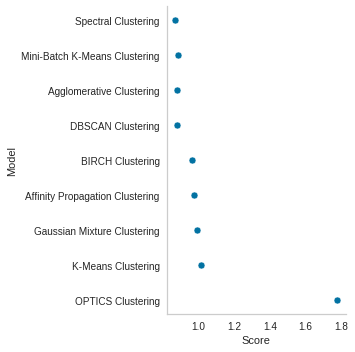

In [ ]:
models=['Spectral Clustering','Mini-Batch K-Means Clustering','Agglomerative Clustering','DBSCAN Clustering','BIRCH Clustering','Affinity Propagation Clustering','Gaussian Mixture Clustering','K-Means Clustering','OPTICS Clustering']
scores=[spec_score,mbkmeans_score,agglo_score,dbscan_score,birch_score,affinpro_score,gaussmix_score,kmeans_score,optics_score]
score_table=pd.DataFrame({'Model':models,'Score':scores})
print(score_table.sort_values(by='Score',axis=0,ascending=True))
sns.barplot(x=score_table['Score'],y=score_table['Model'],palette='inferno').set_title('Clustering Models')
sns.relplot(x=score_table['Score'],y=score_table['Model'])

                           Model     Score
0            Spectral Clustering  0.868714
1       Agglomerative Clustering  0.880871
2              DBSCAN Clustering  0.881184
3  Mini-Batch K-Means Clustering  0.884980


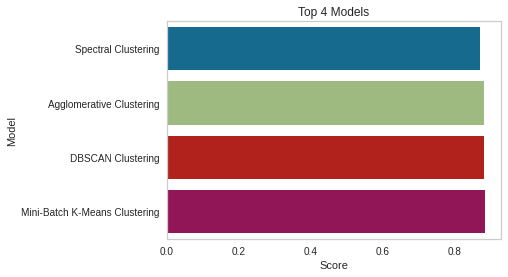

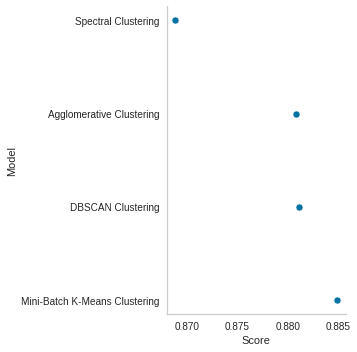

In [ ]:
models=['Spectral Clustering','Agglomerative Clustering','DBSCAN Clustering','Mini-Batch K-Means Clustering']
scores=[spec_score,agglo_score,dbscan_score,mbkmeans_score]
score_table=pd.DataFrame({'Model':models,'Score':scores})
print(score_table.sort_values(by='Score',axis=0,ascending=True))
sns.barplot(x=score_table['Score'], y=score_table['Model']).set_title('Top 4 Models')
sns.relplot(x=score_table['Score'], y=score_table['Model'])

## **8.) References**

[Google](https://www.google.com/)

[YouTube](https://www.youtube.com/)

[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

[Science Direct](https://www.sciencedirect.com/)

[Medium](https://medium.com/)

[Towards Data Science](https://towardsdatascience.com/)

[Analytics Vidhya](https://www.analyticsvidhya.com/)

[Analytics Insight](https://www.analyticsinsight.net/)

[KD Nuggets](https://www.kdnuggets.com/)

***Thank You***